In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from src import utils
from scipy.stats import ranksums

wd = os.path.dirname(os.getcwd())
data_dir = os.path.join(wd, 'data', 'stroke_patients')
output_dir = os.path.join(wd, 'data', 'results')

In [10]:
TIMEPOINT = 'PRE'
df = pd.read_csv(os.path.join(output_dir, 'sub_concept_to_disconnection_representation.csv'))

df_info = pd.read_csv(os.path.join(data_dir, 'participants_preproc.csv'), na_values=['NA', 'ND'])
df_info.loc[df_info.SEX == "M", "SEX"] = 1
df_info.loc[df_info.SEX == "F", "SEX"] = 0
df_info["SEX"] = pd.to_numeric(df_info["SEX"])
# Change BIDS column name to sub
df_info.rename(columns={'BIDS': 'sub'}, inplace=True)

df_motor = df[df['concept'] == 'motor']
df_motor = pd.merge(df_motor, df_info[['sub', f'MOTOR_{TIMEPOINT}']], on='sub').dropna()

df_sensory = df[df['concept'] == 'tactile_perception']
df_sensory = pd.merge(df_sensory, df_info[['sub', f'SENS_{TIMEPOINT}']], on='sub').dropna()

/tmp/ipykernel_1123925/802730108.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_1123925/802730108.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(
/tmp/ipykernel_1123925/802730108.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_1123925/802730108.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(


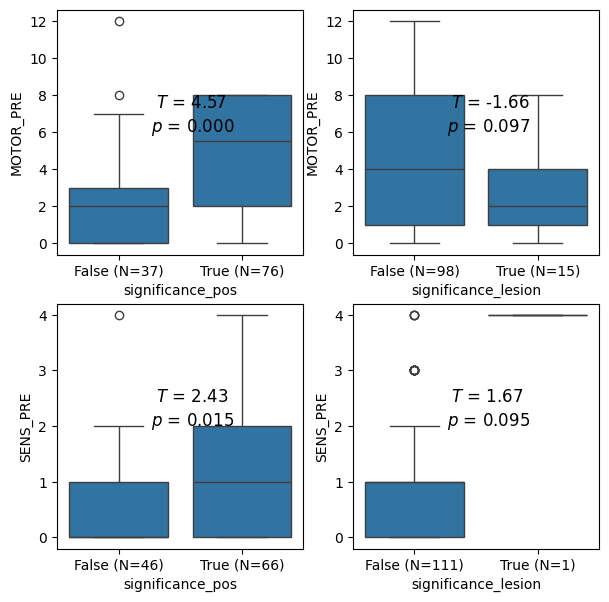

In [13]:
fig = plt.figure(figsize=(7, 7))
idx = 1
for df, scale in zip([df_motor, df_sensory], [f'MOTOR_{TIMEPOINT}', f'SENS_{TIMEPOINT}']):
    ax = fig.add_subplot(2, 2, idx)
    ax2 = fig.add_subplot(2, 2, idx+1)
    idx += 2
    sns.boxplot(data=df, y=scale, x="significance_pos", ax = ax)
    utils.willcoxonfunc(
        df.loc[df['significance_pos'] == True][scale],
        df.loc[df['significance_pos'] == False][scale],
        fsize=12,
        ax=ax,
    )
    ax_xtickslables = [label.get_text() for label in ax.get_xticklabels(which='major')]
    ax.set_xticklabels(
        [
            f"{ax_xtickslables[0]} (N={str((df.loc[df['significance_pos'] == eval(ax_xtickslables[0])]).shape[0])})",
            f"{ax_xtickslables[1]} (N={str((df.loc[df['significance_pos'] == eval(ax_xtickslables[1])]).shape[0])})",
        ]
    )
    sns.boxplot(data=df, y=scale, x="significance_lesion", ax = ax2)
    utils.willcoxonfunc(
        df.loc[df['significance_lesion'] == True][scale],
        df.loc[df['significance_lesion'] == False][scale],
        fsize=12,
        ax=ax2,
    )
    ax_xtickslables = [label.get_text() for label in ax2.get_xticklabels(which='major')]
    ax2.set_xticklabels(
        [
            f"{ax_xtickslables[0]} (N={str((df.loc[df['significance_lesion'] == eval(ax_xtickslables[0])]).shape[0])})",
            f"{ax_xtickslables[1]} (N={str((df.loc[df['significance_lesion'] == eval(ax_xtickslables[1])]).shape[0])})",
        ]
    )
    

plt.savefig(os.path.join(output_dir, f'pos_cdr_validation_{TIMEPOINT}.svg'), format='svg', dpi=300)

